# Extracting Text Features 

In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.wsd import lesk

from googletrans import Translator

import re
import nltk
import googletrans
import string
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

A:\ProgramFiles\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Populating the interactive namespace from numpy and matplotlib


In [2]:
# read from csv
comments = pd.read_csv("../output/malindo_customer_tweets.csv")
print(comments)
print(len(comments))

             username                  id  \
0          raditianto  965263036670918656   
1          missmonyok  965220442263896064   
2        aisyahzahidi  965156318955765760   
3         asoulwindow  927235370399424512   
4          binnyjohnk  927231862803636224   
5          binnyjohnk  927231659304292352   
6          binnyjohnk  927230856770367488   
7            RJVishnu  927230751233286146   
8      IndraniTweeets  927221675048890368   
9       aaitrzairport  927220976638599168   
10         DivsiGupta  927212306202636288   
11       RavenousLegs  927210695153848320   
12    Everywherewithf  927205977866125312   
13        Buoyantfeet  927205376113569792   
14        syazahazira  927195875910103040   
15       drnmaharajan  927165235672203264   
16         binnyjohnk  927138659563794434   
17      polkajunction  927138084541448192   
18         manjulika5  927135785152692228   
19         binnyjohnk  927134714942464000   
20        DoingFamily  927132924591271941   
21    oldm

# Melt paragraphs into sentences by keyword

In [3]:
# instance to remove punctuation such as (!, @, comma, .)
sentence_keyword = '''!".@#$%^&*_~?'''

# list of sentences from paragaphs
sentences = []

# iterate through each row
for idx, row in comments.iterrows():
    
    if row['text'] is None or row['text'] is '' or row['text'] is 'nan':
        continue
    # remove the prefix from facebook
    curr_sent = row['text']
    
    # if there is a new line, then replace it with a fullstop, so it will be split into sentences later
    curr_sent = str(curr_sent).replace('\\n', '.')
    
    # indices of position of all keywords
    indices = [0]
    
    # find the indices of the keyword
    for idx in range(0, len(sentence_keyword)):

        if sentence_keyword[idx] in curr_sent:
            pos = curr_sent.index(sentence_keyword[idx])   
            indices.append(pos)

    # sort the indices
    indices.sort()
    
    # melt the current data frame row into sentences by the indices found previously
    # and remove all of the keywords found within the data
    parts = [curr_sent[i:j] for i,j in zip(indices, indices[1:]+[None])]
    
    # add it into the sentences so we can further proceess
    sentences.extend(parts)

print(len(sentences))

# uncomment to print out the final sentences to be analyze
for sent in sentences:
    print(sent)
    

3805

@malindoair I have bought ticket using an online travel site but i cannot recheck my booking code on the website do you have any way to manually check and send me the eticket each details has been sent to you through DM thank you
I want to ask if i made booking with batik air which one should i contact if i got issue with my booking 
@malindoair @LionAirID @lionairgroup
Yo 
@malindoair u are a joke You overbooked our flight and asked one of us to depart separately on another flight Is this how u treat ur customer Should never happen 
. Boycott @malindoair
Have fun in Bali Miss me
Thanks Vishnu  Do stay tuned for more
Yes its quite amaing Totally loving the experience
Thank you Indrani 
Lovely 
Have a great trip

@AAIOfficial @AirAsia @AirAsiaThai @airindiain @jetairways @malindoair @flysrilankan @flyscoot @jayantsinha @mocagoi @AshokGajapathipictwittercom/yR7rXpE5U
Have fun girl
Lovely
I love Bali
Keeping aside everything d landing 
@ Bali made sure that I fall in love with this 

@malindoair and @indtravel
. WonderfulIndonesia EscapingLife Bali. https://buffly/JcUfF @binnyjohnkpictwittercom/J9Etu68y5
Looking for adventure in Bali away from the sea Try this 
@malindoair and @indtravel
. WonderfulIndonesia EscapingLife Bali https://buffly/AUeJnL @binnyjohnkpictwittercom/8f67drBasC
Looking for adventure in Bali away from the sea Try this 
@malindoair and @indtravel
. WonderfulIndonesia EscapingLife Bali. https://youtube/hBePsnjM @binnyjohnk
Looking for adventure in Bali away from the sea Try this 
@malindoair and @indtravel
. WonderfulIndonesia EscapingLife Bali. https://buffly/KYlZg @binnyjohnkpictwittercom/Ttt7KGaEQ
Looking for adventure in Bali away from the sea Try this 
@malindoair and @indtravel WonderfulIndonesia EscapingLife Bali https://youtube/hBePsnjM @binnyjohnk
Looking for adventure in Bali away from the sea Try this 
@malindoair and @indtravel
. WonderfulIndonesia EscapingLife Bali. https://buffly/iosY7 @binnyjohnk
These are not brands 
@makemytrip @

Anyway will still be going to the airport this morning and hopefully can meet with 
@malindoair representative Tried to call their insurance company last night but they asked to call during office hours for nonmedical related Hopefully everything will goes well 

@malindoair customer support still closed even though flights are cancelled No response for reschedule of the flight Staff on the Brisbane airport dont have any info Please help in alternate arrangements
Looking for adventure in Bali away from the sea Try this 
@malindoair and @indtravel
. WonderfulIndonesia EscapingLife Bali. https://youtube/hBePsnjM @binnyjohnk
Disgusting services by 
@malindoair  flight cancellednot bothered to inform the customer nor they interested in arranging alternates
Me too Any news of these bags
Do you think they know if the volcano will distrupt or not
What a way to end my  months long Holidays travelling through USA  Canada  India   Turkey  And only to be left Stranded in Bali Indonesia  And no re

#### translate all sentences into english

In [4]:
'''
# translate all sentences to english

# translate any foreign languages into english using google translate
translator = Translator()

eng_sentences = []

for sent in sentences:
    try:
        translated = translator.translate(sent, dest='en')
        eng_sentences.append(translated)
    except:
        eng_sentences.append(sent)

        
print(len(eng_sentences))
'''

"\n# translate all sentences to english\n\n# translate any foreign languages into english using google translate\ntranslator = Translator()\n\neng_sentences = []\n\nfor sent in sentences:\n    try:\n        translated = translator.translate(sent, dest='en')\n        eng_sentences.append(translated)\n    except:\n        eng_sentences.append(sent)\n\n        \nprint(len(eng_sentences))\n"

#### write translated text into a file

In [5]:
'''
# google translate takes very long and slow so we save it to a file
# write out the translated words into a txt file

english_path = open("../output/analysis twitter output/english_sentences.txt", "w", encoding="utf-8")
for sent in eng_sentences:
    try:
        english_path.write(sent.text)
        english_path.write('\n')
    except:
        continue

english_path.close()
'''

'\n# google translate takes very long and slow so we save it to a file\n# write out the translated words into a txt file\n\nenglish_path = open("../output/analysis twitter output/english_sentences.txt", "w", encoding="utf-8")\nfor sent in eng_sentences:\n    try:\n        english_path.write(sent.text)\n        english_path.write(\'\n\')\n    except:\n        continue\n\nenglish_path.close()\n'

#### read from the file

In [6]:
sentences = []

with open("../output/analysis twitter output/english_sentences.txt", "r", encoding="utf-8") as f:
    for line in f:
        sentences.append(line)

print(len(sentences))
print(sentences)

2998
['\n', '@malindoair I have bought ticket using an online travel site but i cannot recheck my booking code on the website do you have any way to manually check and send me the eticket each details has been sent to you through DM thank you\n', 'I want to ask if i made booking with batik air which one should i contact if i got issue with my booking\n', '@malindoair @LionAirID @lionairgroup\n', 'I\n', '@malindoair u are a joke You overbooked our flight and asked one of us to depart separately on another flight Is this how u treat ur customer Should never happen\n', '. Boycott @malindoair\n', 'Have fun in Bali Miss me\n', 'Thanks Vishnu  Do stay tuned for more\n', "Yes it's quite amazing Totally loving the experience\n", 'Thank you Indrani\n', 'Lovely\n', 'Have a great trip\n', '\n', '@AAIOfficial @AirAsia @AirAsiaThai @airindiain @jetairways @malindoair @flysrilankan @flyscoot @jayantsinha @mocagoi @AshokGajapathipictwittercom/yR7rXpE5U\n', 'Have fun girl\n', 'Lovely\n', 'I love Bali\

#### abbreviation replacement and lower case sentence continuing

In [7]:
# potential abbreviations (short form) which should be converted into complete word
abbrevs={'hrs':'hours', 'mgnt':'management', 'msg':'message', 'bagage':'baggage', 
         'lugage':'baggage', 'depart':'departure', 'kul':'kuala lumpur', 'airlines':'malindo air',
        'mgmt':'management', 'luggage':'baggage', 'klia':'airport', 'mohd':'', 'airline':'malindo air',
        'malindo':'malindo air', 'malindoair':'malindo air', 'customer':'customer service', 
         'service':'customer service', 'staff':'customer service', 'crew':'flight service',
        'delay':'flight', 'singapore':'tourism hotspot', 'kuala lumpur':'tourism hotspot', 
         'malaysia':'tourism hotspot', 'bali':'tourism hotspot', 'singapore':'tourism hotspot', 
         'perth':'tourism hotspot', 'sabah':'tourism hotspot', 'hanoi':'tourism hotspot', 
         'vietnam':'tourism hotspot', 'frances':'tourism hotspot', 'promo':'price','year':'',
         'interview':'','money':'price', 'city':'tourism hotspot' ,'date':'','abdul':'',
         'airasia':'','morning':'', 'travel':'malindo air','kite':'',
        'respond':'customer service', 'line':'customer service', 'baby':'family', 'rahman':'', 'tggu':'',
        'experience':'customer service', 'rashid':'', 'check':'', 'press':'', 'days':'',
        'boarding':'service', 'route':'flight', 'thats':'', 'https':'', 'mumbai':'', 'hello':'', 'time':'', 'reply':'',
        'gmailcom':'', 'makemytrip':'', 'eticket':'', 'response':'', 'action':'', 'today':'', 'avoid':'', 'today':'',
        'avoid':'', 'team':'', 'congrats':'', 'world':'', 'news':'', 'sent':'', 'hope':'', 'looks':''}

for idx in range(0, len(sentences)):
    
    # to lower case
    sentences[idx] = sentences[idx].lower().replace('@malindoair', '')
    
    # replace any abbreviations into its complete form
    for abbrev in abbrevs:
        sentences[idx] = sentences[idx].lower().replace(abbrev,abbrevs[abbrev])

print(len(sentences))
print(sentences)

2998
['\n', ' i have bought ticket using an oncustomer service malindo air site but i cannot re my booking code on the website do you have any way to manually  and send me the  each details has been  to you through dm thank you\n', 'i want to ask if i made booking with batik air which one should i contact if i got issue with my booking\n', ' @lionairid @lionairgroup\n', 'i\n', ' u are a joke you overbooked our flight and asked one of us to departure separately on another flight is this how u treat ur customer customer service should never happen\n', '. boycott \n', 'have fun in tourism hotspot miss me\n', 'thanks vishnu  do stay tuned for more\n', "yes it's quite amazing totally loving the customer service\n", 'thank you indrani\n', 'lovely\n', 'have a great trip\n', '\n', '@aaiofficial @ @thai @airindiain @jetairways  @flysrilankan @flyscoot @jayantsinha @mocagoi @ashokgajapathipictwittercom/yr7rxpe5u\n', 'have fun girl\n', 'lovely\n', 'i love tourism hotspot\n', 'keeping aside everyt

#### remove interrogative and conditional sentences

In [8]:
# remove interrogative and conditional sentences
sentences2 = []

for sent in sentences:
    
    if '?' in sent or 'if' in sent:
        continue
    else:
        sentences2.append(sent)

sentences = sentences2
print(len(sentences))
print (sentences)

2814
['\n', ' i have bought ticket using an oncustomer service malindo air site but i cannot re my booking code on the website do you have any way to manually  and send me the  each details has been  to you through dm thank you\n', ' @lionairid @lionairgroup\n', 'i\n', ' u are a joke you overbooked our flight and asked one of us to departure separately on another flight is this how u treat ur customer customer service should never happen\n', '. boycott \n', 'have fun in tourism hotspot miss me\n', 'thanks vishnu  do stay tuned for more\n', "yes it's quite amazing totally loving the customer service\n", 'thank you indrani\n', 'lovely\n', 'have a great trip\n', '\n', '@aaiofficial @ @thai @airindiain @jetairways  @flysrilankan @flyscoot @jayantsinha @mocagoi @ashokgajapathipictwittercom/yr7rxpe5u\n', 'have fun girl\n', 'lovely\n', 'i love tourism hotspot\n', 'keeping aside everything d landing\n', '@ tourism hotspot made sure that i fall in love with this place  @indmalindo air @binnyjoh

#### look at the frequency of noun, so we can see what what should be added into recognized entity list

In [9]:
# given a line of text, tokenize the line and return each word along with its tag
def pos_tagging(line):
    for item in nltk.sent_tokenize(line):
        tokenized = nltk.word_tokenize(item)
        tagged = nltk.pos_tag(tokenized, tagset= "universal")
        return tagged

frequency_table = {}

for sent in sentences:
    tagged_lists = pos_tagging(sent)
    
    if tagged_lists is None:
        continue
    
    for tag in tagged_lists:
        w, word_type = tag
        
        if word_type != 'NOUN':
            continue
        
        if w not in frequency_table:
            frequency_table[w] = 0
        
        frequency_table[w] = frequency_table[w] + 1

        
sorted_keys = sorted(frequency_table, key=frequency_table.get, reverse = True)

for key in sorted_keys:
    print(key + " , " + str(frequency_table[key]))

air , 608
@ , 582
customer , 355
hotspot , 344
flight , 327
service , 292
tourism , 289
malindo , 277
i , 273
baggage , 101
airport , 96
hi , 78
flights , 76
please , 70
ticket , 50
refund , 47
thank , 45
/ , 45
thanks , 43
price , 42
hours , 39
status , 36
adventure , 35
day , 34
kl , 32
help , 31
try , 30
sea , 30
care , 29
number , 29
email , 28
bag , 28
services , 27
way , 25
tickets , 25
http , 25
volcano , 25
chandranmalindo , 24
im , 23
airindiain , 22
indmalindo , 22
s , 22
trip , 21
flyscoot , 21
details , 20
mas , 20
situation , 20
hour , 20
people , 20
passengers , 19
bags , 18
dm , 17
passenger , 17
night , 17
tomorrow , 17
months , 16
phone , 16
counter , 16
india , 16
emails , 16
thai , 15
office , 15
dont , 15
guys , 15
need , 15
complaint , 15
delhi , 15
fun , 14
mocagoi , 14
wow , 14
dear , 14
penang , 14
support , 14
pnr , 14
compensation , 14
u , 13
ground , 13
month , 13
case , 13
cost , 13
airvistara , 13
seat , 13
jayantsinha , 12
something , 12
plane , 12
eruptio

indonesiapictwittercom/u8gulg4f9 , 1
winter , 1
bengaluruairport , 1
kathleen , 1
katpegimanapictwittercom/zaluxsbpvn , 1
hahahaha , 1
moves , 1
dipanshu , 1
emiratessupport , 1
inefficiency , 1
operator , 1
button , 1
agencies , 1
farebasis , 1
ashokgajapathipictwittercom/gc5oisd87 , 1
aaistvairport , 1
avgeek , 1
amarabrol , 1
pictwittercom/n36gmt6gv , 1
skywalks , 1
againi , 1
development , 1
ur , 1
gili , 1
islands , 1
polaris , 1
filtering , 1
pictwittercom/fu3jb55mb , 1
wonderfulindonesia , 1
nancychau4 , 1
posts , 1
blogs , 1
reading , 1
airblogin/7//tourism , 1
hotspotscenictopviewfrommalindo , 1
airairwindowseathtmlpictwittercom/rfrlbw8hvl , 1
yess , 1
ak , 1
tanahlot , 1
indonesiatourism , 1
pictwittercom/7vdbwpcfxw , 1
isid , 1
shiver , 1
step , 1
buoyantfeetpictwittercom/xi6slzdi , 1
mandara , 1
toll , 1
whoaaa , 1
goodbyes , 1
buoyantfeet , 1
manjulika5 , 1
dipanshugoyal , 1
cheers , 1
video , 1
//youtube/owti63uc8rmpictwittercom/vez8fgxbw , 1
sunrise , 1
relaxing , 1
reju

#### first layer entity recognition define strict recognized entity list

In [10]:
recognized_entities = ['kuala lumpur', 'malindo air', 'customer service', 'tourism hotspot', 'malindo', 'airport', 'service', 
                       'airline', 'staff', 'baggage', 'malaysia', 'boarding', 
                       'class', 'journey', 'departure',
                      'route', 'festival', 'flight', 'book', 'bali', 'customer', 'crew']

sentence_clusters = []

#### first layer NER - strict entity lexicons

In [11]:
# keep a list of sentences that has not yet been recognized
no_entity_sentences = []

for idx in range(0, len(sentences)):

    for re in recognized_entities:
        if re in sentences[idx]:
            sentence_clusters.append({'entity':re, 'sentence':sentences[idx]}) 
            
            continue
    
    no_entity_sentences.append(sentences[idx])

for cluster in sentence_clusters:
    print('entity : ' + cluster['entity'] + '\t sentence : ' + cluster['sentence'])

entity : malindo air	 sentence :  i have bought ticket using an oncustomer service malindo air site but i cannot re my booking code on the website do you have any way to manually  and send me the  each details has been  to you through dm thank you

entity : customer service	 sentence :  i have bought ticket using an oncustomer service malindo air site but i cannot re my booking code on the website do you have any way to manually  and send me the  each details has been  to you through dm thank you

entity : malindo	 sentence :  i have bought ticket using an oncustomer service malindo air site but i cannot re my booking code on the website do you have any way to manually  and send me the  each details has been  to you through dm thank you

entity : service	 sentence :  i have bought ticket using an oncustomer service malindo air site but i cannot re my booking code on the website do you have any way to manually  and send me the  each details has been  to you through dm thank you

entity 


entity : flight	 sentence :  hi malindo air do u have flights to/from chiangmai

entity : malindo air	 sentence : i  to have that customer service on my next flight from sjo to mia by american malindo air air january 3 8

entity : customer service	 sentence : i  to have that customer service on my next flight from sjo to mia by american malindo air air january 3 8

entity : malindo	 sentence : i  to have that customer service on my next flight from sjo to mia by american malindo air air january 3 8

entity : service	 sentence : i  to have that customer service on my next flight from sjo to mia by american malindo air air january 3 8

entity : flight	 sentence : i  to have that customer service on my next flight from sjo to mia by american malindo air air january 3 8

entity : customer	 sentence : i  to have that customer service on my next flight from sjo to mia by american malindo air air january 3 8

entity : malindo air	 sentence : hi all based on current situation is it fine to ma

#### second layer NER - nltk.ne_chunk, named entity chunk

In [12]:
# define a method to iterate through the nouns with nltk.ne_chunk
# iterate throughs the trees, subtrees and leaves to construct a word
def NER(line):
    
    recognized_entities = []
    for item in nltk.sent_tokenize(line):
        
        tagged = nltk.pos_tag(nltk.word_tokenize(item))
        chunks = nltk.ne_chunk(tagged)
        
        entities = []
        for tag in tagged:
            w, w_type = tag
            if w_type not in entities and 'NN' in w_type:
                entities.append(w)
        
        for x in chunks.subtrees():
            for y in x.subtrees():
                
                entity = []
                for ent in y.leaves():
                    word, w_type = ent
                    
                    if word in entities:
                        entity.append(word)
                
                curr_word = ' '.join([x for x in entity])
                
                if curr_word not in recognized_entities:
                    recognized_entities.append(curr_word)
                
    if len(recognized_entities) > 0:
        recognized_entities = recognized_entities[1:len(recognized_entities)-1]
    
    return recognized_entities

no_entity_sentences2 = []

for idx in range(0, len(no_entity_sentences)):
    
    res = NER(no_entity_sentences[idx])
    if len(res) is not 0:
        sentence_clusters.append({'entity':res[0], 'sentence':no_entity_sentences[idx]}) 
        continue
        
    no_entity_sentences2.append(no_entity_sentences[idx])

no_entity_sentences = no_entity_sentences2

for cluster in sentence_clusters:
    print('entity : ' + cluster['entity'] + '\t sentence : ' + cluster['sentence'])

entity : malindo air	 sentence :  i have bought ticket using an oncustomer service malindo air site but i cannot re my booking code on the website do you have any way to manually  and send me the  each details has been  to you through dm thank you

entity : customer service	 sentence :  i have bought ticket using an oncustomer service malindo air site but i cannot re my booking code on the website do you have any way to manually  and send me the  each details has been  to you through dm thank you

entity : malindo	 sentence :  i have bought ticket using an oncustomer service malindo air site but i cannot re my booking code on the website do you have any way to manually  and send me the  each details has been  to you through dm thank you

entity : service	 sentence :  i have bought ticket using an oncustomer service malindo air site but i cannot re my booking code on the website do you have any way to manually  and send me the  each details has been  to you through dm thank you

entity 


entity : flight	 sentence :  please up tomorrow flight status to delhi

entity : tourism hotspot	 sentence :  i have flight to tourism hotspot tomorrow is that still on schedule or cancel

entity : flight	 sentence :  i have flight to tourism hotspot tomorrow is that still on schedule or cancel

entity : malindo air	 sentence : fully everything goes well for u last  i went to tourism hotspot pun flight flighted sbb volcano eruption and i took malindo air also they managed it very well carikan hotel for us to stay  night provide food and next day we can go home

entity : tourism hotspot	 sentence : fully everything goes well for u last  i went to tourism hotspot pun flight flighted sbb volcano eruption and i took malindo air also they managed it very well carikan hotel for us to stay  night provide food and next day we can go home

entity : malindo	 sentence : fully everything goes well for u last  i went to tourism hotspot pun flight flighted sbb volcano eruption and i took malindo ai

#### third layer NER - part to speech using nltk.pos, extract only the noun

In [13]:
# given a line of text, tokenize the line and return each word along with its tag
def pos_tagging(line):
    for item in nltk.sent_tokenize(line):
        tokenized = nltk.word_tokenize(item)
        tagged = nltk.pos_tag(tokenized, tagset= "universal")
        return tagged

no_entity_sentences2 = []

for idx in range(0, len(no_entity_sentences)):
    
    tags = pos_tagging(no_entity_sentences[idx])
    
    if tags is None:
        continue
    
    flag = False
    
    
    for tag in tags:
        
        word, word_t = tag
        
        if word_t == 'NOUN':
            print(word)
            sentence_clusters.append({'entity':word, 'sentence':no_entity_sentences[idx]}) 
            flag = True
            break
    
    continue
    if flag is True:
        break
    
    no_entity_sentences2.append(no_entity_sentences[idx])

no_entity_sentences = no_entity_sentences2
for cluster in sentence_clusters:
    print('entity : ' + cluster['entity'] + '\t sentence : ' + cluster['sentence'])

i
@
i
u
fun
thanks
yes
thank
trip
@
fun
i
everything
tourism
fly
day
thank
thank
customer
kochi
malindo
thank
flights
meh
malindo
fab
anyone
@
business
howah
hi
flight
//twittercom/chirayusdesai/status/93978434868544
look
i
viper
wow
dear
@
jkjrtourism
i
customer
month
collages
hotels
@
please
flight
cant
thank
ground
havent
view
greetings
dude
things
dishes
flights
job
whatsapp
i
hi
flight
bank
hi
halo
way
traditions
refund
thank
thanks
issue
baggage
assistance
pieces
air
anthem
didnt
day
@
baham
tokyo
mr
street
part
hi
help
thanks
thank
pics
wow
strike
hurry
blast
appreciation
customer
hi
man
flight
hi
tourism
tourism
flight
periscope
i
governance
thank
rai
cc
price
kb
pictwittercom/skovzeowp
hi
flight
ground
collapse
malindo
//
pictwittercom/yt78cufk6
batikair
naren
fireflymalindo
i
yeah
day
kids
envy
luxury
kl
@
@
i
questions
mcm
flight
ing
pir
i
ive
riska
@
tourism
airler
status
bags
search
tuesday
dear
bags
hi
hang
bag
malindo
flyxiamen
malindo
cabin
eh
@
pictwittercom/lpywodbwqb

adventure
offbeat
offbeat
indmalindo
option
offers
phuket
x
customer
issues
@
adventure
@
adventure
@
adventure
@
adventure
brands
cheaters
hours
sushmaswaraj
n
adventure
csia
issues
flight
company
airindia
dont
@
sushmaswaraj
software
u
complain
customer
hey
rjvishnu
malindo
wat
malindo
malindo
@
purchase
wow
thank
plan
wat
issue
note
hi
need
hi
please
everyone
fares
friend
customer
walking
i
sure
hi
home
kamigengnajibraak
poormalay
salute
@
friend
phew
thought
reputation
alarm
return
i
air
weeks
i
damn
respect
honeymoon
mean
baggage
malindo
economy
i
thank
@
lot
spiritmalindo
customer
grind
@
//wwwreuterscom/article/usindonesiavolcanochina/chinasuspendsflightsfromtourism
@
baggage
dafak
customer
flight
chubb
policy
chubb
tourism
tickets
hi
email
flight
start
allin
i
dm
hi
hi
i
tweet
hi
seatspictwittercom/xktgu8lpk
flight
arrivals
refunds
refund
im
ryanair
yesand
tocomplaints
flights
hye
dec
flight
pictwittercom/fnsi9q3byn
hi
@
option
flights
malindo
malindo
prayer
pictwittercom/qaakv


entity : malindo air	 sentence :  @fireflymalindo air air @ @mas wants to apply hijab to stewardess islampictwittercom / eirukcbbc

entity : malindo	 sentence :  @fireflymalindo air air @ @mas wants to apply hijab to stewardess islampictwittercom / eirukcbbc

entity : malindo air	 sentence : the worst malindo air air of the  i malindo airled by this on 9 jan lost my baggage  moreover late by  hours no lounge access i will ask people not to malindo air by malindo air no

entity : malindo	 sentence : the worst malindo air air of the  i malindo airled by this on 9 jan lost my baggage  moreover late by  hours no lounge access i will ask people not to malindo air by malindo air no

entity : baggage	 sentence : the worst malindo air air of the  i malindo airled by this on 9 jan lost my baggage  moreover late by  hours no lounge access i will ask people not to malindo air by malindo air no

entity : baggage	 sentence :   im quite diy with your apps i book my tic flight through expedia apps a


entity : @	 sentence :  and @indmalindo air

entity : adventure	 sentence : looking for adventure in tourism hotspot away from the sea try this

entity : @	 sentence :  and @indmalindo air

entity : adventure	 sentence : looking for adventure in tourism hotspot away from the sea try this

entity : @	 sentence :  and @indmalindo air

entity : adventure	 sentence : looking for adventure in tourism hotspot away from the sea try this

entity : @	 sentence :  and @indmalindo air

entity : adventure	 sentence : looking for adventure in tourism hotspot away from the sea try this

entity : brands	 sentence : these are not brands

entity : cheaters	 sentence : @  these are cheaters

entity : hours	 sentence : stranded for 33 hours at airport  to reach media stuckintourism hotspot

entity : sushmaswaraj	 sentence : @sushmaswaraj @consumerforum @cppolice needhelp and solution i  you treat every issue equally brands just make us runaround chase cheated @ 

entity : n	 sentence : easy to vanish an

#### remove entities where punctuation maybe wrongly classified as a noun
#### remove entities where entities is not random gribbish 
#### remove repetitive sentences (caused by facebook scrapping or spams)

In [14]:
from collections import OrderedDict

# black list contains all the words that we do not want
# the words are mainly machine generated, does not contain any useful information
blacklist = ['x9f', 'x98', 'xe0', 'xb8', 'xe8', 'xf0x', '\u200b\u200b', 'xc3', 'xb8',
             'xf0', 'x92', 'xa3', 'x89', 'xb9', 'x9c', 'x81', 'x93', 'x99', 'xa9', 'xad', 
             'x8d', 'xe6', 'xa4', 'x8a', 'x88', 'xf0x9fx98x8a', 'xf0x9fx98x8dxf0x9fx98x8dxf0x9fx98x8d',
            'xf0x9fx98x82xf0x9fx98x8', 'xf0x9fx98x82xf0x9fx98x82xf0x9fx98x82', 'xa0', 'b737800',
            'i', 'hahaha', 'thanks', 'congratulations', 'siti', 'haha', 'muhammad', 'thank', 
             'please', 'ismail', 'month', 'hafiz', 'return', 'hahahaha', 'sulaiman', 'updates', 'lahore', 'muhd',
            'hahahah', 'bandung', 'atikah', 'huhu', 'akma', 'azura', 'mami', 'want', 'aziz', 'place', 'woww', 'omar', 
             'hanis', 'keryn', 'suheila', 'azrul', 'zmyry', 'david', 'vanessa', 'zaini', 'rachel', 'zazali', 'sarah', 
             'chan', 'mama', 'watie', 'okay', 'phnom', 'bena', 'lynn', 'wait', 'carol', 'alan', 'khairul', 'safirah', 
             'months', 'start', 'zainudin', 'mana', 'hashim', 'atiqah', 'linda', 'hutasuhut', 'janice', 'kong', 'nair', 
             'shah', 'fikri', 'stephanie', 'jasmine', 'farah', 'mark', 'amritsar', 'name', 'dhivaashini', 'hasina', 'marina',
            'kumar']

# punctuation removal
punctuation_removal = str.maketrans(' ', ' ', string.punctuation)

unique_sentences = []
sentence_clusters2 = []
entity2={}

for cluster in sentence_clusters:
    
    # remove punctuation that may be present in entity
    entity = cluster['entity'].translate(punctuation_removal)
    
    # entity contains only punctuation, (wrongly classfied, then just dont append it to the entity)
    if entity is '' or entity in blacklist:
        continue
    
    # remove punctuations from sentence and remove the entity from the sentence
    cluster['sentence'] = cluster['sentence'].translate(punctuation_removal)
    
    for r_entity in recognized_entities:
        cluster['sentence'] = cluster['sentence'].replace(r_entity, ' ')
    
    if cluster['sentence'] in unique_sentences:
        continue
    else:
        unique_sentences.append(cluster['sentence'])
    
    if entity not in entity2:
        entity2[entity] = 0
        
    entity2[entity] = entity2[entity] + 1
    
    sentence_clusters2.append({'entity':entity, 'sentence':cluster['sentence']})

sentence_clusters = sentence_clusters2

for cluster in sentence_clusters2:
    print('entity : ' + cluster['entity'] + '\t sentence : ' + cluster['sentence'])

entity : malindo air	 sentence :  i have bought ticket using an on    site but i cannot re my  ing code on the website do you have any way to manually  and send me the  each details has been  to you through dm thank you

entity : customer service	 sentence :  u are a joke you over ed our   and asked one of us to   separately on another   is this how u treat ur     should never happen

entity : tourism hotspot	 sentence : have fun in   miss me

entity : customer service	 sentence : yes its quite amazing totally loving the  

entity : tourism hotspot	 sentence : i love  

entity : malindo air	 sentence :    made sure that i fall in love with this place  ind  binnyjohnk ravenouslegspictwittercomefsvaxcflx

entity : airport	 sentence :  fly from   or     kl  ho chi mint

entity : tourism hotspot	 sentence : have a good day at  pictwittercomuggpwn6ynd

entity : customer service	 sentence : my first   on

entity : tourism hotspot	 sentence :   flying from kochi to denpasar in  

entity : mal

#### remove non sensible entity characters

In [15]:
sorted_dict = OrderedDict(sorted(entity2.items(), key=lambda t: t[1], reverse = True))

entity_of_interests = []

for elem in sorted_dict.items():
    key, freq = elem
    
    if freq > 2 and len(key) > 3:
        if key not in entity_of_interests:
            entity_of_interests.append(key)

sentence_clusters2 = []
for sent in sentence_clusters:
    if sent['entity'] in entity_of_interests:
        sentence_clusters2.append(sent)
    
sentence_clusters = sentence_clusters2
for cluster in sentence_clusters2:
    print('entity : ' + cluster['entity'] + '\t sentence : ' + cluster['sentence'])

entity : malindo air	 sentence :  i have bought ticket using an on    site but i cannot re my  ing code on the website do you have any way to manually  and send me the  each details has been  to you through dm thank you

entity : customer service	 sentence :  u are a joke you over ed our   and asked one of us to   separately on another   is this how u treat ur     should never happen

entity : tourism hotspot	 sentence : have fun in   miss me

entity : customer service	 sentence : yes its quite amazing totally loving the  

entity : tourism hotspot	 sentence : i love  

entity : malindo air	 sentence :    made sure that i fall in love with this place  ind  binnyjohnk ravenouslegspictwittercomefsvaxcflx

entity : airport	 sentence :  fly from   or     kl  ho chi mint

entity : tourism hotspot	 sentence : have a good day at  pictwittercomuggpwn6ynd

entity : customer service	 sentence : my first   on

entity : tourism hotspot	 sentence :   flying from kochi to denpasar in  

entity : mal

entity : malindo air	 sentence :  for making our honeymoon   to     and kualalumpur an fbmen8xc4us

entity : malindo air	 sentence :  for making our honeymoon   to     and kualalumpur an enjoyable one truly cherish the business hospitality

entity : customer service	 sentence :   during the ktm    on november 7th i noticed that my   had not arrived i immediately told your   that handles   to which i filled a claim form

entity : customer service	 sentence :  its the worst in   my refund which was supposed to come in 9  has not yet been processed and they have the worst call centre ever  at all costs

entity : flight	 sentence :  like cibai  

entity : customer service	 sentence : adityaghosh6e wpsg8 aaitr  airindiain aseerachary ashoksundar flyscoot jayantsinha flytrujet jetairways  model layout of the upcoming new terminal  trz   in  with trz  s upgradation trivandrum lucknow  s will also be upgraded pictwittercomcyyvgqku

entity : tourism hotspot	 sentence :  to blr   now flying x we

#### part of speech tagging to the sentence

In [16]:
# stemming
ps = PorterStemmer()

sentence_clusters2 = []

# iterate through each row
for sent in sentence_clusters:
    
    # part of speech tagging
    tags = pos_tagging(sent['sentence'])
    
    if tags is None:
        continue
    
    # current sentence, instance to be appended to the sentence cluster
    #curr_sentence = {'sentence':sent[''], 'entity':'', 'words':[], 'type':[]}
    words = []
    types = []
    
    # iterate through the list of potential entities
    for entity in tags:

        word, w_type = entity
        
        # current word is a stop word
        if word in stopwords.words() or word in blacklist:
            continue
        
        words.append(word)
        types.append(w_type)
    
    # stem the words
    words = [ps.stem(w) for w in words]
    
    # add it to the data clusters
    sentence_clusters2.append({'sentence':sent['sentence'], 'entity':sent['entity'], 'word':words, 'type':types})

sentence_clusters = sentence_clusters2
#for cluster in sentence_clusters2:
#    print('entity : ' + cluster['entity'] + '\t sentence : ' + cluster['sentence'])

#### summarize our final cleaned sentences

In [17]:
# view total number of sentences
print(len(sentence_clusters))

for cluster in sentence_clusters2:
    print('entity : ' + cluster['entity'] + '\t sentence : ' + cluster['sentence'])
    

1065
entity : malindo air	 sentence :  i have bought ticket using an on    site but i cannot re my  ing code on the website do you have any way to manually  and send me the  each details has been  to you through dm thank you

entity : customer service	 sentence :  u are a joke you over ed our   and asked one of us to   separately on another   is this how u treat ur     should never happen

entity : tourism hotspot	 sentence : have fun in   miss me

entity : customer service	 sentence : yes its quite amazing totally loving the  

entity : tourism hotspot	 sentence : i love  

entity : malindo air	 sentence :    made sure that i fall in love with this place  ind  binnyjohnk ravenouslegspictwittercomefsvaxcflx

entity : airport	 sentence :  fly from   or     kl  ho chi mint

entity : tourism hotspot	 sentence : have a good day at  pictwittercomuggpwn6ynd

entity : customer service	 sentence : my first   on

entity : tourism hotspot	 sentence :   flying from kochi to denpasar in  

entity 

In [18]:
for cluster in sentence_clusters:
    for idx in range(0, len(cluster['word'])):
        print('word : ' + cluster['word'][idx] + '\t type : ' + cluster['type'][idx])
        

word : bought	 type : VERB
word : ticket	 type : NOUN
word : use	 type : VERB
word : site	 type : NOUN
word : ing	 type : VERB
word : code	 type : NOUN
word : websit	 type : NOUN
word : way	 type : NOUN
word : manual	 type : ADV
word : send	 type : VERB
word : detail	 type : NOUN
word : dm	 type : NOUN
word : joke	 type : NOUN
word : ask	 type : VERB
word : one	 type : NUM
word : us	 type : PRON
word : separ	 type : ADV
word : anoth	 type : DET
word : treat	 type : NOUN
word : ur	 type : NOUN
word : never	 type : ADV
word : happen	 type : VERB
word : fun	 type : NOUN
word : miss	 type : NOUN
word : ye	 type : X
word : quit	 type : ADJ
word : amaz	 type : ADJ
word : total	 type : ADV
word : love	 type : VERB
word : love	 type : VERB
word : made	 type : VERB
word : sure	 type : ADJ
word : fall	 type : VERB
word : love	 type : NOUN
word : binnyjohnk	 type : NOUN
word : ravenouslegspictwittercomefsvaxcflx	 type : NOUN
word : fli	 type : NOUN
word : kl	 type : VERB
word : good	 type : ADJ
w

word : senior	 type : ADJ
word : citizen	 type : NOUN
word : buy	 type : VERB
word : ticket	 type : NOUN
word : counter	 type : NOUN
word : option	 type : NOUN
word : purchas	 type : VERB
word : senior	 type : ADJ
word : citien	 type : NOUN
word : due	 type : ADJ
word : aaitr	 type : NOUN
word : trichi	 type : NOUN
word : aaitr	 type : NOUN
word : mocagoi	 type : NOUN
word : jayantsinha	 type : NOUN
word : ashokgajapathi	 type : VERB
word : aaioffici	 type : ADJ
word : airindiain	 type : NOUN
word : indigo6	 type : NOUN
word : jetairway	 type : NOUN
word : flyscoot	 type : VERB
word : flysrilankan	 type : ADJ
word : thaipictwittercom9vdxwbqklr	 type : NOUN
word : fli	 type : VERB
word : dmk	 type : NOUN
word : 8hour	 type : NUM
word : 3hour	 type : NUM
word : given	 type : VERB
word : mcdonald	 type : NOUN
word : voucher	 type : ADV
word : nonhal	 type : NOUN
word : vegetarian	 type : ADJ
word : option	 type : NOUN
word : spoke	 type : VERB
word : ground	 type : NOUN
word : told	 type 

word : us	 type : PRON
word : wheelchair	 type : NOUN
word : dont	 type : VERB
word : free	 type : ADJ
word : seat	 type : NOUN
word : front	 type : NOUN
word : row	 type : VERB
word : expect	 type : VERB
word : wheelchair	 type : NOUN
word : passeng	 type : NOUN
word : walk	 type : VERB
word : nd	 type : ADJ
word : row	 type : NOUN
word : fail	 type : VERB
word : blogger	 type : ADJ
word : kotakinabalu	 type : NOUN
word : lost	 type : VERB
word : jan7	 type : NOUN
word : refund	 type : NOUN
word : despit	 type : ADP
word : constant	 type : ADJ
word : follow	 type : VERB
word : remors	 type : NOUN
word : whatsoev	 type : ADV
word : worst	 type : ADV
word : ever	 type : ADV
word : think	 type : VERB
word : fli	 type : VERB
word : cheat	 type : NOUN
word : lost	 type : VERB
word : air	 type : NOUN
word : jan7	 type : NOUN
word : almost	 type : ADV
word : refund	 type : NOUN
word : despit	 type : ADP
word : constant	 type : ADJ
word : follow	 type : VERB
word : remors	 type : NOUN
word : 

word : jutawan	 type : NOUN
word : jennyf	 type : NOUN
word : od	 type : VERB
word : 66	 type : NUM
word : szb	 type : NOUN
word : kbr	 type : VERB
word : sy	 type : ADJ
word : rasa	 type : NOUN
word : awk	 type : NOUN
word : cantik	 type : NOUN
word : beat	 type : NOUN
word : fast	 type : ADV
word : saw	 type : VERB
word : 3	 type : NUM
word : thing	 type : NOUN
word : consid	 type : VERB
word : saturday	 type : ADJ
word : night	 type : NOUN
word : last	 type : ADJ
word : week	 type : NOUN
word : ask	 type : VERB
word : ure	 type : ADJ
word : 3	 type : NUM
word : joke	 type : NOUN
word : held	 type : VERB
word : back	 type : ADV
word : kl	 type : NOUN
word : complaint	 type : NOUN
word : rais	 type : VERB
word : yet	 type : ADV
word : receiv	 type : VERB
word : ouch	 type : ADJ
word : better	 type : ADJ
word : ask	 type : VERB
word : kt	 type : ADP
word : transport	 type : VERB
word : good	 type : NOUN
word : mcm	 type : ADJ
word : diorg	 type : NOUN
word : got	 type : VERB
word : kej

word : south	 type : ADJ
word : east	 type : ADJ
word : asia	 type : NOUN
word : httpwww	 type : NOUN
word : airblogin7v	 type : NOUN
word : airwhichisbetterhtmlpictwittercomjfquuadfr	 type : NOUN
word : sushmaswaraj	 type : NOUN
word : pl	 type : NOUN
word : pl	 type : NOUN
word : ask	 type : VERB
word : someon	 type : NOUN
word : look	 type : VERB
word : invalid	 type : NOUN
word : passport	 type : NOUN
word : blamegam	 type : VERB
word : worst	 type : ADJ
word : air	 type : NOUN
word : agent	 type : NOUN
word : new	 type : ADJ
word : kkjakarta	 type : NOUN
word : clap3	 type : NOUN
word : indonesia	 type : NOUN
word : duniadekho	 type : NOUN
word : air	 type : NOUN
word : wonderfulindonesia	 type : NOUN
word : pilgrimag	 type : NOUN
word : trichi	 type : VERB
word : dont	 type : ADJ
word : miss	 type : NOUN
word : visit	 type : VERB
word : old	 type : ADJ
word : templ	 type : NOUN
word : around	 type : ADP
word : trichi	 type : NOUN
word : aaioffici	 type : ADJ
word : airindiain	 ty

word : 97	 type : NUM
word : dp	 type : NOUN
word : closur	 type : NOUN
word : announc	 type : VERB
word : let	 type : VERB
word : know	 type : VERB
word : fli	 type : VERB
word : asap	 type : NOUN
word : million	 type : NUM
word : thankscas	 type : NOUN
word : solv	 type : VERB
word : even	 type : ADV
word : minuteaft	 type : NOUN
word : hour	 type : NOUN
word : wait	 type : VERB
word : sigh	 type : ADJ
word : patienc	 type : ADV
word : wait	 type : VERB
word : pl	 type : NOUN
word : open	 type : ADJ
word : one	 type : NUM
word : special	 type : ADJ
word : hot	 type : ADJ
word : mount	 type : NOUN
word : agung	 type : NOUN
word : issueim	 type : VERB
word : call	 type : VERB
word : mount	 type : NOUN
word : agung	 type : ADJ
word : issu	 type : NOUN
word : punjust	 type : NOUN
word : nak	 type : VERB
word : detail	 type : NOUN
word : punhmmm	 type : NOUN
word : refund	 type : NOUN
word : schedul	 type : VERB
word : yesterday	 type : NOUN
word : 7	 type : NUM
word : nov	 type : NOUN
wo

#### writing all the cleaned data into several files

In [19]:
# google translate takes very long and slow so we save it to a file
# write out the translated words into a txt file
entity_path = open("../output/analysis twitter output/entity.txt", "w", encoding="utf-8")
sentence_path = open("../output/analysis twitter output/sentence.txt", "w", encoding="utf-8")
words_path = open("../output/analysis twitter output/words.txt", "w", encoding="utf-8")
types_path = open("../output/analysis twitter output/types.txt", "w", encoding="utf-8")

for sent in sentence_clusters:
    entity_path.write(sent['entity'])
    entity_path.write('\n')
    
    sentence_path.write(sent['sentence'])
    
    for idx in range(0, len(sent['word'])):
        words_path.write(sent['word'][idx])
        if idx != len(sent['word'])-1:
            words_path.write(',')
    words_path.write('\n')
    for idx in range(0, len(sent['type'])):
        types_path.write(sent['type'][idx])
        if idx != len(sent['type'])-1:
            types_path.write(',')
    types_path.write('\n')

entity_path.close()
sentence_path.close()
words_path.close()
types_path.close()

#### loading cleaned data

In [20]:
# google translate takes very long and slow so we save it to a file
# write out the translated words into a txt file
entity = []
sentence = []
words = []
types = []

with open("../output/analysis twitter output/entity.txt", "r", encoding="utf-8") as f:
    for line in f:
        entity.append(line.replace('\n',''))
        
with open("../output/analysis twitter output/sentence.txt", "r", encoding="utf-8") as f:
    for line in f:
        sentence.append(line.replace('\n',''))
        
with open("../output/analysis twitter output/words.txt", "r", encoding="utf-8") as f:
    for line in f:
        words.append(line.replace('\n','').split(','))
        
with open("../output/analysis twitter output/types.txt", "r", encoding="utf-8") as f:
    for line in f:
        types.append(line.replace('\n','').split(','))

print(len(entity))
print(len(sentence))
print(len(words))
print(len(types))

# construct the sentence clusters
sentence_clusters = []
for idx in range(0, len(entity)):
    sentence_clusters.append({'entity':entity[idx], 'sentence':sentence[idx], 'word':words[idx], 'type':types[idx]})
    
print(sentence_clusters)

1065
1065
1065
1065
[{'entity': 'malindo air', 'sentence': ' i have bought ticket using an on    site but i cannot re my  ing code on the website do you have any way to manually  and send me the  each details has been  to you through dm thank you', 'word': ['bought', 'ticket', 'use', 'site', 'ing', 'code', 'websit', 'way', 'manual', 'send', 'detail', 'dm'], 'type': ['VERB', 'NOUN', 'VERB', 'NOUN', 'VERB', 'NOUN', 'NOUN', 'NOUN', 'ADV', 'VERB', 'NOUN', 'NOUN']}, {'entity': 'customer service', 'sentence': ' u are a joke you over ed our   and asked one of us to   separately on another   is this how u treat ur     should never happen', 'word': ['joke', 'ask', 'one', 'us', 'separ', 'anoth', 'treat', 'ur', 'never', 'happen'], 'type': ['NOUN', 'VERB', 'NUM', 'PRON', 'ADV', 'DET', 'NOUN', 'NOUN', 'ADV', 'VERB']}, {'entity': 'tourism hotspot', 'sentence': 'have fun in   miss me', 'word': ['fun', 'miss'], 'type': ['NOUN', 'NOUN']}, {'entity': 'customer service', 'sentence': 'yes its quite amazin

In [21]:
# create frequency table
frequency_table = {}

for idx in range(0, len(sentence_clusters)):
    w = sentence_clusters[idx]['word']
    w_type = sentence_clusters[idx]['type']
    
    for word_idx in range(0, len(w)):

        if w_type[word_idx] not in frequency_table:
            frequency_table[w_type[word_idx]] = {}

        if w[word_idx] not in frequency_table[w_type[word_idx]]:
            frequency_table[w_type[word_idx]][w[word_idx]] = 0

        frequency_table[w_type[word_idx]][w[word_idx]] = frequency_table[w_type[word_idx]][w[word_idx]] + 1

In [22]:
# get the frequency keys
print(frequency_table.keys())

#print(frequency_table['NUM'])
#print(frequency_table['NOUN'])
#print(frequency_table['VERB'])
#print(frequency_table['ADV'])
#print(frequency_table['ADJ'])
#print(frequency_table['ADP'])
#print(frequency_table['PRT'])
#print(frequency_table['DET'])
#print(frequency_table['PRON'])
#print(frequency_table['.'])
#print(frequency_table['X'])
#print(frequency_table['CONJ'])

# get words along with its frequency by its frequency type
# frequency type can be NUM, NOUN, VERB and ...
def get_sorted_frequency(freq_type, show_all = False, top_count = 20):
    
    curr_counter = 0
    sorted_keys = sorted(frequency_table[freq_type], key=frequency_table[freq_type].get, reverse = True)
    temp = {}
    for key in sorted_keys:
        
        temp[key] = frequency_table[freq_type][key]
        
        if show_all is False and (top_count == curr_counter):
            break
        
        curr_counter = curr_counter + 1
    return temp

# you can change the type to see the frequency
# 
print(get_sorted_frequency('NOUN', False, 20))

dict_keys(['VERB', 'NOUN', 'ADV', 'NUM', 'PRON', 'DET', 'X', 'ADJ', 'ADP', '', '.', 'CONJ', 'PRT'])
{'air': 222, 'ticket': 56, 'hour': 52, 'refund': 46, 'hi': 38, 'price': 38, 'bag': 35, 'email': 33, 'passeng': 28, 'volcano': 27, 'help': 26, 'kl': 25, 'delhi': 25, 'chandran': 25, 'day': 23, 'statu': 23, 'way': 22, 'number': 21, 'trip': 20, 'offic': 18, 'jetairway': 18}


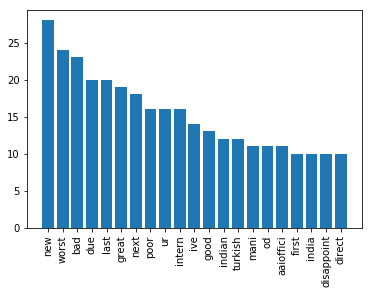

In [23]:
# plot bar chart
# frequency type can be NUM, NOUN, VERB and ...
def plot_by_type(freq_type, showAll = False, top_count = 20):
    wordsdict = get_sorted_frequency(freq_type, showAll, top_count)
    
    plt.bar(range(len(wordsdict)), wordsdict.values(), align='center')
    plt.xticks(range(len(wordsdict)), wordsdict.keys(), rotation='vertical')
    plt.show()
    
plot_by_type('ADJ', False, 20)

## I have provided some tools for checking out the frequency, word, and word type.

## Pre-processing has already been done, the preprocessing step contains the following:

    1. translation to english via google translation (many of the strings are bahasa melayu)
    2. string tokenization
    3. to lower case
    4. punctuations removal (.,?! and etc...)
    5. stopword removal (I, and, you and etc...)
    6. part of speech tagging (NOUN, VERB, NUM, ADJ, ADV, PRT and etc...)
    
## now entities and words has been extracted, time for sentimental analysis at sentence level

#### we first try to see if there is any interesting common adjectives or words that is commonly used for a certain entity

In [24]:
# group entity with their common words (example: baggage -> adjectives('lost', 'slow', 'terrible')
tag_of_interests = ['ADJ', 'VERB', 'NOUN', 'NUM', 'ADV']

# group entity is a dictionary containing {'baggage':{'lost':3, 'terrible':5}, ....}
group_entity = {}

for sent in sentence_clusters:
    entity = sent['entity']
    # entity is empty continue with loop
    if entity is '':
        continue
    
    # add entity to group entity
    if entity not in group_entity:
        group_entity[entity] = {'word':{}}
    
    idx = 0
    for word in sent['word']:
        
        # current word is in tag of interets then add it into the group entity
        if sent['type'][idx] in tag_of_interests:
            
            if word not in group_entity[entity]['word']:
                group_entity[entity]['word'][word] = 0
            
            group_entity[entity]['word'][word] = group_entity[entity]['word'][word] + 1

        idx = idx + 1
        
for elem in group_entity:
    print("Entity Name: " + elem)
    
    sorted_keys = sorted(group_entity[elem]['word'], key=group_entity[elem]['word'].get, reverse = True)
    tuples = []
    for key in sorted_keys:
        tuples.append((key, group_entity[elem]['word'][key]))
        #print('entity : ' + key + " " + str(group_entity[elem]['word'][key]))
    print(tuples)

Entity Name: malindo air
[('air', 220), ('refund', 28), ('chandran', 25), ('help', 24), ('ticket', 23), ('get', 23), ('fli', 22), ('go', 21), ('worst', 21), ('cancel', 21), ('email', 19), ('dont', 19), ('one', 19), ('ling', 18), ('ing', 17), ('volcano', 16), ('price', 16), ('hour', 16), ('lost', 15), ('need', 15), ('india', 14), ('ask', 14), ('3', 14), ('give', 14), ('call', 13), ('last', 13), ('way', 12), ('cost', 12), ('compens', 12), ('even', 12), ('passeng', 12), ('turkish', 12), ('od', 11), ('pictwittercom', 11), ('airindia', 11), ('8', 10), ('ur', 10), ('bad', 10), ('delhi', 10), ('bag', 10), ('kl', 10), ('know', 10), ('never', 10), ('airindiain', 10), ('follow', 10), ('trip', 10), ('websit', 9), ('chang', 9), ('day', 9), ('pay', 9), ('support', 9), ('flyscoot', 9), ('jetairway', 9), ('airvistara', 9), ('issu', 9), ('hotel', 8), ('firefli', 8), ('keep', 8), ('due', 8), ('provid', 8), ('would', 8), ('new', 8), ('still', 8), ('cant', 8), ('trz', 8), ('5', 8), ('6', 8), ('detail', 7

#### sentiment analysis using SentimentIntensityAnalyzer from nltk.sentiment.vader

In [25]:
# -> each sentence, evaluate adjectives and count how many happy, angry, neutral
# -> each sentence, determine if it is happy, angry or neutral
# sentence_sentiment will contain data in format of [{neg_count:5, pos_count:5, neu_count:2
# , neg:[negative words..], pos:[positive words..], neu:[neutral words..]}]
sentence_sentiment = []

# also keep a list of lexicon
neg_lexicon = ['uncivil', 'neg', 'superbad', 'pathet', 'sever', 'last', 'unhappi', 'unabl', 'irrespons',
          'horribl', 'cancel', 'inconveni', 'joker', 'shock', 'problem', 'delay', 'lost', 'doesnt',
            'apolog']

sid = SentimentIntensityAnalyzer()

for sent in sentence_clusters:
    
    entity = sent['entity']
    if entity is '':
        continue
    
    # lists of positive, neutral or negative words
    pos_word_list=[]
    neu_word_list=[]
    neg_word_list=[]
    polarity_list=[]
    word_list=[]
    
    idx = 0
    for word in sent['word']:
        
        #print(word + " " + sent['type'][idx])
        
        # current word is in tag of interets then add it into the group entity
        if sent['type'][idx] not in tag_of_interests:
            continue
        
        if word in neg_lexicon:
            neg_word_list.append(word)
        elif (sid.polarity_scores(word)['compound']) >= 0.5:
            pos_word_list.append(word)
        elif (sid.polarity_scores(word)['compound']) <= -0.5:
            neg_word_list.append(word)
        else:
            neu_word_list.append(word)     
        
        word_list.append(word)
        polarity_list.append(sid.polarity_scores(word)['compound'])
        
        idx = idx + 1
    
    # append the sentence's count, and its sentimental words
    sentence_sentiment.append({'pos_count':len(pos_word_list), 'neg_count':len(neg_word_list), 
                               'neu_count':len(neu_word_list), 'pos':pos_word_list, 'neg':neg_word_list, 
                               'neu':neu_word_list, 'pol':polarity_list, 'word':word_list})

# count how many sentences is negative, neutral or positive
neu_count = 0
pos_count = 0
neg_count = 0


for idx in range(0, len(sentence_sentiment)):

    if sentence_sentiment[idx]['neg'] > sentence_sentiment[idx]['pos']:
        neg_count = neg_count + 1
    elif sentence_sentiment[idx]['neg'] < sentence_sentiment[idx]['pos']:
        pos_count = pos_count + 1
    else:
        neu_count = neu_count + 1
        
print("negative sentences : " + str(neg_count))
print("positive sentences : " + str(pos_count))
print("neutral sentences : " + str(neu_count))

negative sentences : 187
positive sentences : 64
neutral sentences : 814


#### print out and summarize the sentiment in a nice view

In [26]:
for idx in range(0, len(sentence_sentiment)):
    print('sentence : ' + sentence_clusters[idx]['sentence'])
    print('negative sentiment count : ' + str(sentence_sentiment[idx]['neg_count']))
    print('positive sentiment count : ' + str(sentence_sentiment[idx]['pos_count']))
    print('neutral count : ' + str(sentence_sentiment[idx]['neu_count']))
    
    print('negative words')
    print(sentence_sentiment[idx]['neg'])
    print('positive words')
    print(sentence_sentiment[idx]['pos'])
    print('neutral words')
    print(sentence_sentiment[idx]['pos'])
    
    print('words')
    print(sentence_sentiment[idx]['word'])
    print('polarity')
    print(sentence_sentiment[idx]['pol'])

sentence :  i have bought ticket using an on    site but i cannot re my  ing code on the website do you have any way to manually  and send me the  each details has been  to you through dm thank you
negative sentiment count : 0
positive sentiment count : 0
neutral count : 12
negative words
[]
positive words
[]
neutral words
[]
words
['bought', 'ticket', 'use', 'site', 'ing', 'code', 'websit', 'way', 'manual', 'send', 'detail', 'dm']
polarity
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
sentence :  u are a joke you over ed our   and asked one of us to   separately on another   is this how u treat ur     should never happen
negative sentiment count : 0
positive sentiment count : 0
neutral count : 3
negative words
[]
positive words
[]
neutral words
[]
words
['joke', 'ask', 'one']
polarity
[0.296, 0.0, 0.0]
sentence : have fun in   miss me
negative sentiment count : 0
positive sentiment count : 1
neutral count : 1
negative words
[]
positive words
['fun']
neutral words
['fun'

negative words
[]
positive words
[]
neutral words
[]
words
['agre', 'refund', 'amount', '3', 'week', 'receiv', 'hotel', 'chain', 'alreadi', 'refund']
polarity
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
sentence :  not sure what id   prob
negative sentiment count : 0
positive sentiment count : 0
neutral count : 3
negative words
[]
positive words
[]
neutral words
[]
words
['sure', 'id', 'prob']
polarity
[0.3182, 0.0, 0.0]
sentence : next trip    and cambodia
negative sentiment count : 0
positive sentiment count : 0
neutral count : 3
negative words
[]
positive words
[]
neutral words
[]
words
['next', 'trip', 'cambodia']
polarity
[0.0, 0.0, 0.0]
sentence :  hi  why i cant  in for   tomorrow 
negative sentiment count : 0
positive sentiment count : 0
neutral count : 3
negative words
[]
positive words
[]
neutral words
[]
words
['hi', 'cant', 'tomorrow']
polarity
[0.0, 0.0, 0.0]
sentence :     kno  93  64am dtcjib
negative sentiment count : 0
positive sentiment count : 0
neutral count 

positive words
[]
neutral words
[]
words
['turkish', 'air', 'sign', 'codeshar', 'agreementeturbocom66465', 'airturkish', 'airsignedcodeshareagr']
polarity
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
sentence :  they are awful for carrying on lenses and super strictrude    air
negative sentiment count : 0
positive sentiment count : 1
neutral count : 5
negative words
[]
positive words
['super']
neutral words
['super']
words
['aw', 'carri', 'lens', 'super', 'strictrud', 'air']
polarity
[0.0, 0.0, 0.0, 0.5994, 0.0, 0.0]
sentence : we are in 7 and what kind of   air dont have a number to dial for help in   would prefer
negative sentiment count : 0
positive sentiment count : 1
neutral count : 8
negative words
[]
positive words
['kind']
neutral words
['kind']
words
['7', 'kind', 'air', 'dont', 'number', 'dial', 'help', 'would', 'prefer']
polarity
[0.0, 0.5267, 0.0, 0.0, 0.0772, 0.0, 0.4019, 0.0, 0.0]
sentence :  and turkish  air signed a codeshare agreement
negative sentiment count : 0
positive senti

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
sentence :  very irresponsible behaviour in your part you misplaced our   from kl to   important medicines in it look into it asap pictwittercomvfnf5ooov9
negative sentiment count : 1
positive sentiment count : 0
neutral count : 9
negative words
['irrespons']
positive words
[]
neutral words
[]
words
['irrespons', 'behaviour', 'part', 'misplac', 'kl', 'import', 'medicin', 'look', 'asap', 'pictwittercomvfnf5ooov9']
polarity
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
sentence :  irresponsible behaviourmisplaced our   from kl to  imp medicine need by tomorrowlocateandreturn
negative sentiment count : 1
positive sentiment count : 0
neutral count : 6
negative words
['irrespons']
positive words
[]
neutral words
[]
words
['irrespons', 'behaviourmisplac', 'kl', 'imp', 'medicin', 'need', 'tomorrowlocateandreturn']
polarity
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
sentence :  very irresponsible behavior on your part you misplaced our   from kl to   impo

[]
sentence :   air boeing b738   spictwittercomvst6pxekt7
negative sentiment count : 0
positive sentiment count : 0
neutral count : 4
negative words
[]
positive words
[]
neutral words
[]
words
['air', 'boe', 'b738', 'spictwittercomvst6pxekt7']
polarity
[0.0, 0.0, 0.0, 0.0]
sentence :  i had  ed hotel room in phuket thailand from   holiday i am in need to change hotel i need to know the procedure for change  cancel as its a free cancellation hotel till april 8 tia
negative sentiment count : 2
positive sentiment count : 2
neutral count : 15
negative words
['cancel', 'cancel']
positive words
['free', 'tia']
neutral words
['free', 'tia']
words
['hotel', 'room', 'phuket', 'thailand', 'holiday', 'need', 'chang', 'hotel', 'need', 'know', 'procedur', 'chang', 'cancel', 'free', 'cancel', 'hotel', 'april', '8', 'tia']
polarity
[0.0, 0.0, 0.0, 0.0, 0.4019, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.25, 0.5106, -0.25, 0.0, 0.0, 0.0, 0.5106]
sentence :   return our   instead of asking us to follow up d

positive words
[]
neutral words
[]
words
['look', 'adventur', 'away', 'tri']
polarity
[0.0, 0.0, 0.0, 0.0]
sentence :  and ind 
negative sentiment count : 0
positive sentiment count : 0
neutral count : 0
negative words
[]
positive words
[]
neutral words
[]
words
[]
polarity
[]
sentence :  what is the status of  s from amritsar to   my   is tomorrow i am hearing  about other   air cancelling their  s to   please confirm
negative sentiment count : 1
positive sentiment count : 0
neutral count : 5
negative words
['cancel']
positive words
[]
neutral words
[]
words
['statu', 'tomorrow', 'hear', 'air', 'cancel', 'confirm']
polarity
[0.0, 0.0, 0.0, 0.0, -0.25, 0.0]
sentence :   air alert for bengaluru peeps
negative sentiment count : 0
positive sentiment count : 0
neutral count : 4
negative words
[]
positive words
[]
neutral words
[]
words
['air', 'alert', 'bengaluru', 'peep']
polarity
[0.0, 0.296, 0.0, 0.0]
sentence :  for your friendly    pictwittercomuwnqqds9xu
negative sentiment count : 0


positive words
[]
neutral words
[]
words
['email', 'get', 'get', 'email', 'standard', 'notic', 'publish', 'websit', 'ask']
polarity
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
sentence :  am on hold for the last 3 minutes calling your       no agent is answering the calls what kind of   is this
negative sentiment count : 1
positive sentiment count : 1
neutral count : 7
negative words
['last']
positive words
['kind']
neutral words
['kind']
words
['hold', 'last', '3', 'minut', 'call', 'agent', 'answer', 'call', 'kind']
polarity
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5267]
sentence :  twittercom airstatus98889368347937
negative sentiment count : 0
positive sentiment count : 0
neutral count : 2
negative words
[]
positive words
[]
neutral words
[]
words
['twittercom', 'airstatus98889368347937']
polarity
[0.0, 0.0]
sentence : are you not rerouting passengers to other indonesian  s for their  s we are not able to remain in   until the  s resume from dps would like to be re d and leave a

[]
words
['hi', 'help', 'regard', 'leav', 'tonight', 'cancel']
polarity
[0.0, 0.4019, 0.0, 0.0, 0.0, -0.25]
sentence :  i am due to fly from   on 3th november   number od38 to denpasar   is this still scheduled to fly
negative sentiment count : 0
positive sentiment count : 0
neutral count : 10
negative words
[]
positive words
[]
neutral words
[]
words
['due', 'fli', '3th', 'novemb', 'number', 'od38', 'denpasar', 'still', 'schedul', 'fli']
polarity
[0.0, 0.0, 0.0, 0.0, 0.0772, 0.0, 0.0, 0.0, 0.0, 0.0]
sentence :  poor   we are stickers at the     due to volcanic eruption here no accommodation nor food provided by   air
negative sentiment count : 0
positive sentiment count : 0
neutral count : 9
negative words
[]
positive words
[]
neutral words
[]
words
['poor', 'sticker', 'due', 'volcan', 'erupt', 'accommod', 'food', 'provid', 'air']
polarity
[-0.4767, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
sentence : i think trichy is the only tier    in india having more  s to kl alone from an interna

In [27]:
# summarize every sentence based on entity (example: baggage -> sentiment_happy: 20, sentiment_angry:40)

for elem in group_entity:
    #print("Entity Name: " + elem)
    sorted_keys = sorted(group_entity[elem]['word'], key=group_entity[elem]['word'].get, reverse = True)
    
    for word in sorted_keys:
        
        if 'sentiment' not in group_entity[elem]:
            group_entity[elem]['sentiment'] = {}
        
        if word in neg_lexicon:
            group_entity[elem]['sentiment'][word] = "negative"
        elif (sid.polarity_scores(word)['compound']) >= 0.5:
            group_entity[elem]['sentiment'][word] = "negative"
        elif (sid.polarity_scores(word)['compound']) <= -0.5:
            group_entity[elem]['sentiment'][word] = "positive"
        else:
            group_entity[elem]['sentiment'][word] = "neutral"

#### summarize based on entity with non-neutral words (example: baggage -> [(lost, 20), (bad, 30), ...]

In [28]:
for entity in group_entity:
    print("Entity name : " + entity)
    tuples = []
    for word in group_entity[entity]['word']:
        if group_entity[entity]['sentiment'][word] is "neutral":
            continue
        tuples.append((word, group_entity[entity]['word'][word]))
    print(tuples)

Entity name : malindo air
[('love', 5), ('stupid', 3), ('worst', 21), ('cancel', 21), ('bad', 10), ('fuck', 1), ('unabl', 2), ('lost', 15), ('last', 13), ('disgust', 2), ('fail', 5), ('shock', 2), ('doesnt', 3), ('enlighten', 1), ('trust', 2), ('great', 5), ('pathet', 4), ('free', 3), ('sick', 1), ('death', 1), ('ban', 1), ('rape', 1), ('best', 4), ('shit', 1), ('super', 2), ('kind', 2), ('problem', 4), ('honour', 2), ('pain', 1), ('tia', 1), ('fraud', 1), ('sever', 1), ('suffer', 1), ('spite', 3), ('horribl', 2)]
Entity name : customer service
[('love', 4), ('apolog', 1), ('pathet', 3), ('great', 7), ('fail', 2), ('sever', 2), ('worst', 12), ('bad', 6), ('doesnt', 3), ('smartest', 2), ('shit', 1), ('scam', 1), ('ideal', 1), ('cancel', 5), ('goddam', 1), ('kind', 2), ('horribl', 2), ('disgust', 2), ('lost', 3), ('remorseless', 1), ('last', 2), ('free', 1), ('unhappi', 1), ('fuck', 2), ('problem', 1), ('trust', 1), ('irrespons', 1), ('vip', 1), ('best', 1), ('unabl', 1), ('pleasant', 1)

#### summarize based on entity (example: baggage -> sentiment_happy: 20, sentiment_angry:40)

In [29]:
entity_path = open("../output/analysis twitter output/twitter_aspect_sentiments.csv", "w", encoding="utf-8")
entity_path.write('entity,pos,neg,neu,pos_proportion,neg_proportion\n')

for elem in group_entity:
    #print("Entity Name: " + elem)
    sorted_keys = sorted(group_entity[elem]['word'], key=group_entity[elem]['word'].get, reverse = True)
    
    pos = 0
    neg = 0
    neu = 0
    
    for word in sorted_keys:
        
        if word in neg_lexicon:
            neg = neg + 1
        elif (sid.polarity_scores(word)['compound']) >= 0.5:
            neg = neg + 1
        elif (sid.polarity_scores(word)['compound']) <= -0.5:
            pos = pos + 1
        else:
            neu = neu + 1
    
    count = pos+neg
    
    if count == 0:
        continue
    
    entity_path.write(elem+','+str(pos)+','+str(neg)+','+str(neu)+','+str(pos/count)
                      +','+str(neg/count)+'\n')
    
    print('entity : ' + elem)
    print('positive : ' + str(pos) + ' negative : ' + str(neg) + ' neutral : ' + str(neu))

entity_path.close()

entity : malindo air
positive : 15 negative : 20 neutral : 1545
entity : customer service
positive : 11 negative : 22 neutral : 720
entity : tourism hotspot
positive : 3 negative : 15 neutral : 760
entity : airport
positive : 1 negative : 5 neutral : 265
entity : flight
positive : 2 negative : 11 neutral : 558
entity : service
positive : 0 negative : 2 neutral : 110
entity : book
positive : 2 negative : 2 neutral : 91
entity : baggage
positive : 3 negative : 3 neutral : 217
entity : departure
positive : 1 negative : 2 neutral : 69
entity : street
positive : 0 negative : 1 neutral : 9
entity : price
positive : 1 negative : 1 neutral : 37
entity : bags
positive : 2 negative : 1 neutral : 32
